# Question 1

**Refer to the HighPeaks data.**

##  Part (a)

**Fit the regression model of Y = Time on X = Ascent.**

In [1]:
Peaks = read.csv("HighPeaks.csv")
attach(Peaks)
fix(Peaks)

In [2]:
model = lm(Time~Ascent)
summary(model)


Call:
lm(formula = Time ~ Ascent)

Residuals:
   Min     1Q Median     3Q    Max 
-4.327 -2.075 -0.150  1.414  6.529 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 4.2100541  1.8661683   2.256  0.02909 * 
Ascent      0.0020805  0.0005909   3.521  0.00101 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.496 on 44 degrees of freedom
Multiple R-squared:  0.2198,	Adjusted R-squared:  0.2021 
F-statistic:  12.4 on 1 and 44 DF,  p-value: 0.001014


**(i) What is the fitted model?**

From the summary above, the fitted model is $\text{Time} \approx 0.002\cdot\text{Ascent} + 4.21$.

**(ii) Test the null hypothesis that Ascent is not related to Time. Provide the P-value and state the conclusion.**

From the coefficients table above, we see that the p-value for Ascent is 0.001 which is less than 0.05. Therefore we reject the null hypothesis and conclude that there is convincing evidence to reject the claim that Ascent is not related to Time.

## Part (b)

**From your model in part (a), interpret the coefficient of Ascent in the context of this setting.**

The coefficient of Ascent (0.002) represents that for every 1 foot incerase in the ascent, the time for a round trip increases by 0.002 hours (around 7 seconds).

## Part (c)

**Construct a 95% confidence interval for $\beta_1$, the coefficient of Ascent in the model.**

In [3]:
confint(model, level=0.95)

,2.5 %,97.5 %
(Intercept),0.4490389766,7.971069312
Ascent,0.0008897376,0.003271313


We are 95% confident that the true value of $\beta_1$ is between 0.00088 and 0.0033.

## Part (d)

**Construct a 95% prediction interval for trip Time when Ascent is 3000.**

In [4]:
predict(model, newdata=data.frame(Ascent=3000), interval="prediction", level=0.95)

,fit,lwr,upr
1,10.45163,5.365099,15.53816


We are 95% confident that a new mountain with an Ascent of 3000 ft will have round trip time between 5.36 and 15.54 hrs.

## Part (e)

**Are there any mountains that have unusually large residuals for this model? If so, what is the (approximate) magnitude of the largest standardized residual? (You can read this off of a graph; there is no need for a precise calculation.)**

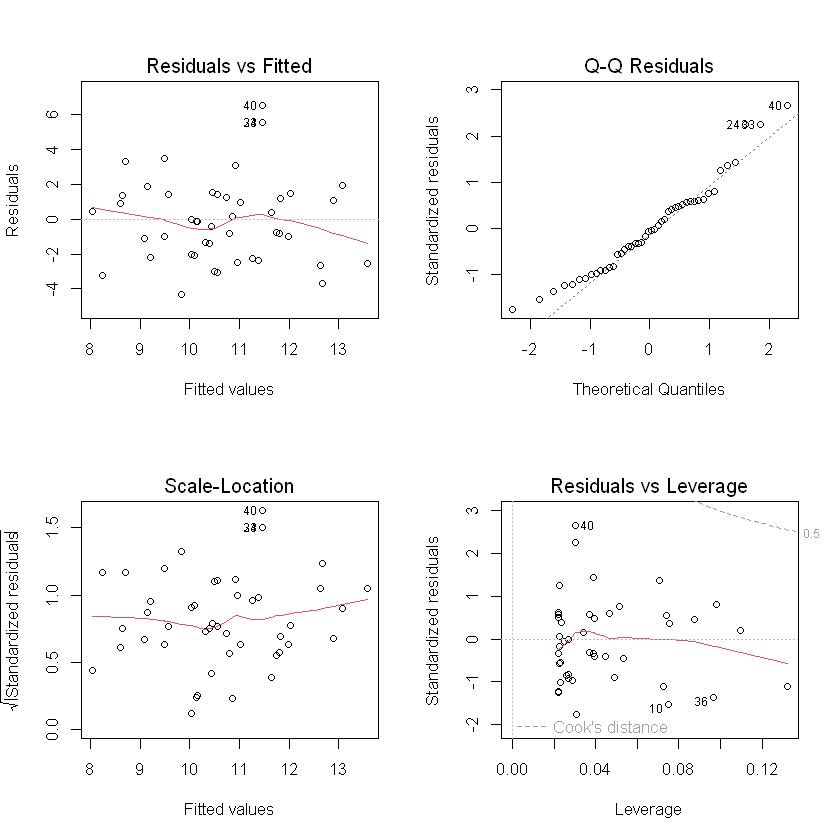

In [5]:
par(mfrow=c(2,2))
plot(model)

If we look at the Residual vs Fitted graph, we can see that there are some mountains with unusually large residuals specifically mountains 40, 24, and 33. Mountain 40 (Mt. Emmons) has the highest magnitude residual of approximately 6 hours based on the graph, which corresponds to a standardized residual of 2.656 (not extremely unusual because it is within the range of -3 to 3 but still pretty high).

In [6]:
stdresid = rstandard(model)
stdresid[which.max(stdresid)]

40 
2.656208

# Question 2

**In general (not referring to the HighPeaks data specifically) draw scatterplots that illustrate the failure of each of these two simple linear regression assumptions. Label your axes to indicate what is being plotted in each case.**

## Part (a)

**a plot that shows a lack of linearity.**

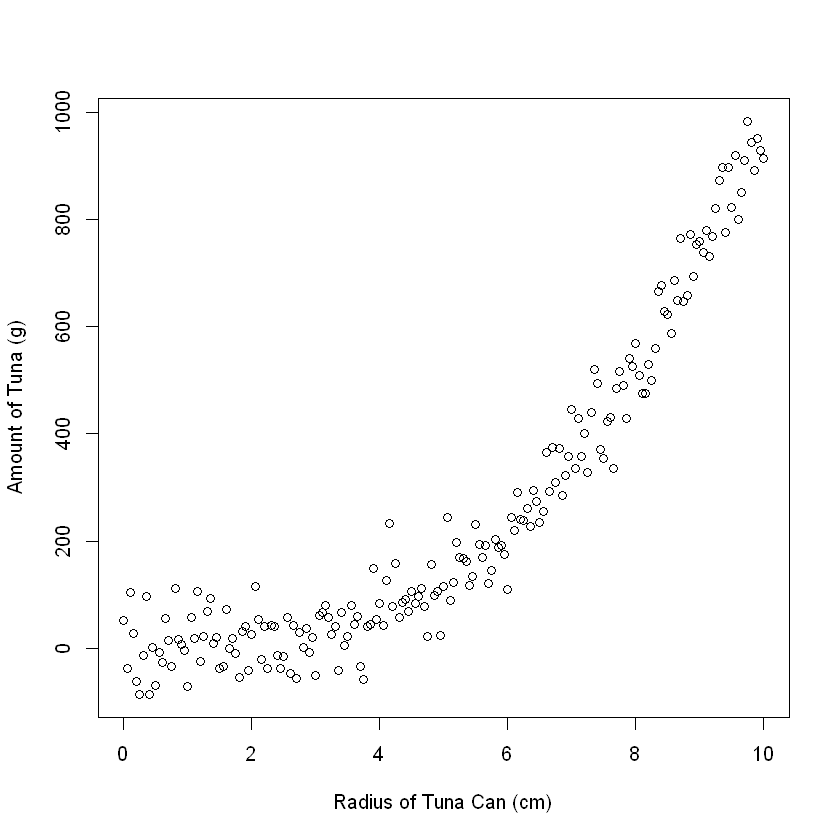

In [7]:
N = 10
X = seq(0, N, 0.05)
Y = X^3+50*rnorm(length(X)) # Cubic plot
plot(X, Y, xlab="Radius of Tuna Can (cm)", ylab="Amount of Tuna (g)")

## Part (b)

**a plot that shows a lack of homoscedasticity.**

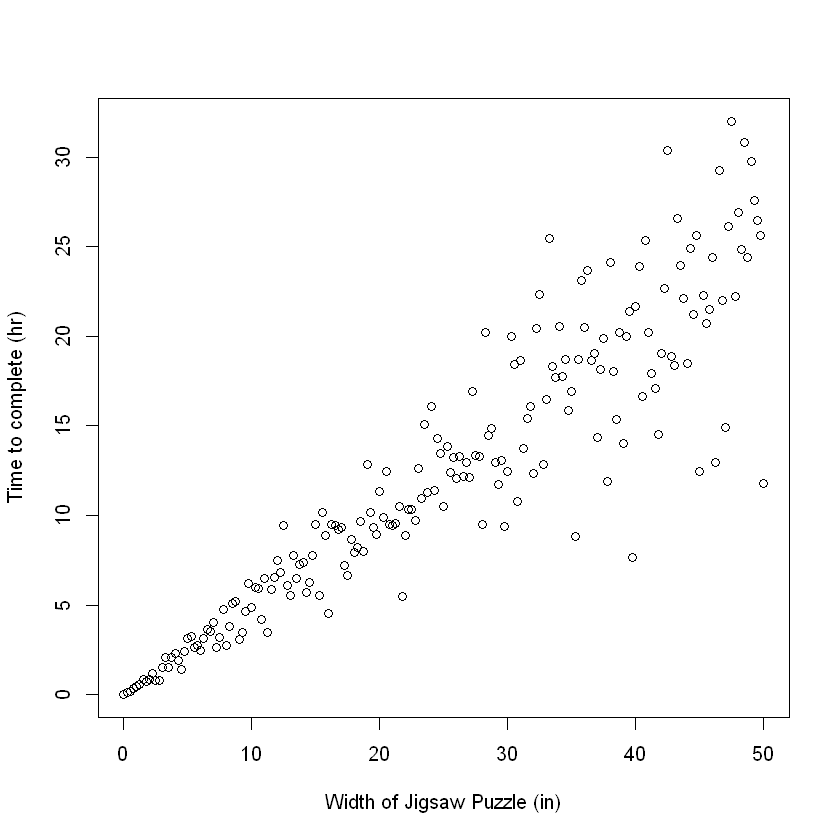

In [8]:
N = 50
X = seq(0, N,0.25)
Y = 1/2*(X+X/5*rnorm(length(X))) # Error depends on X
plot(X, Y, xlab="Width of Jigsaw Puzzle (in)", ylab="Time to complete (hr)")

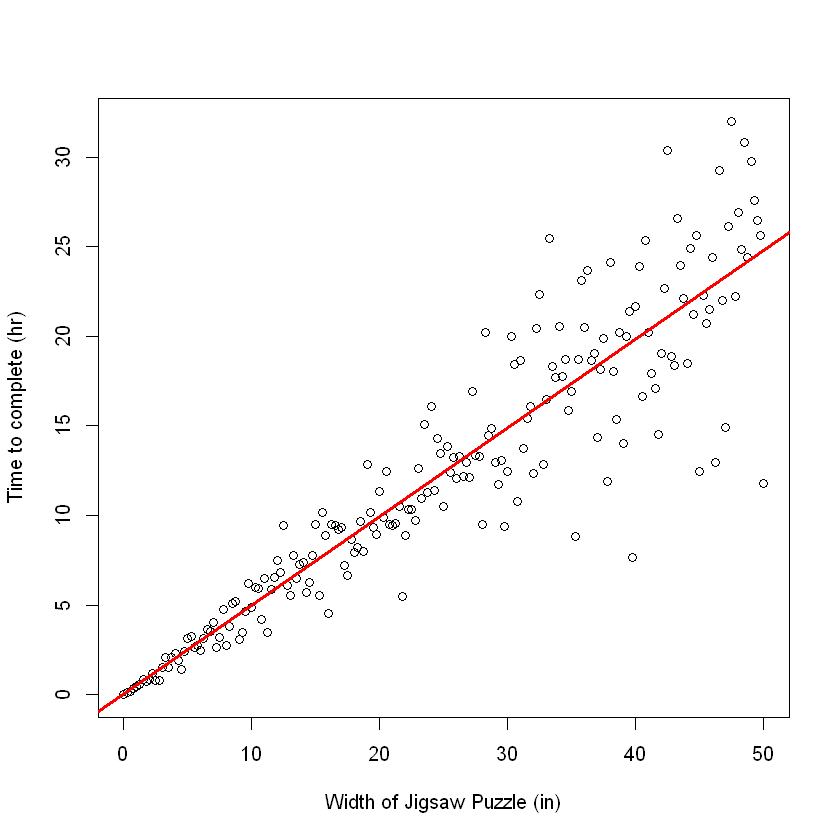

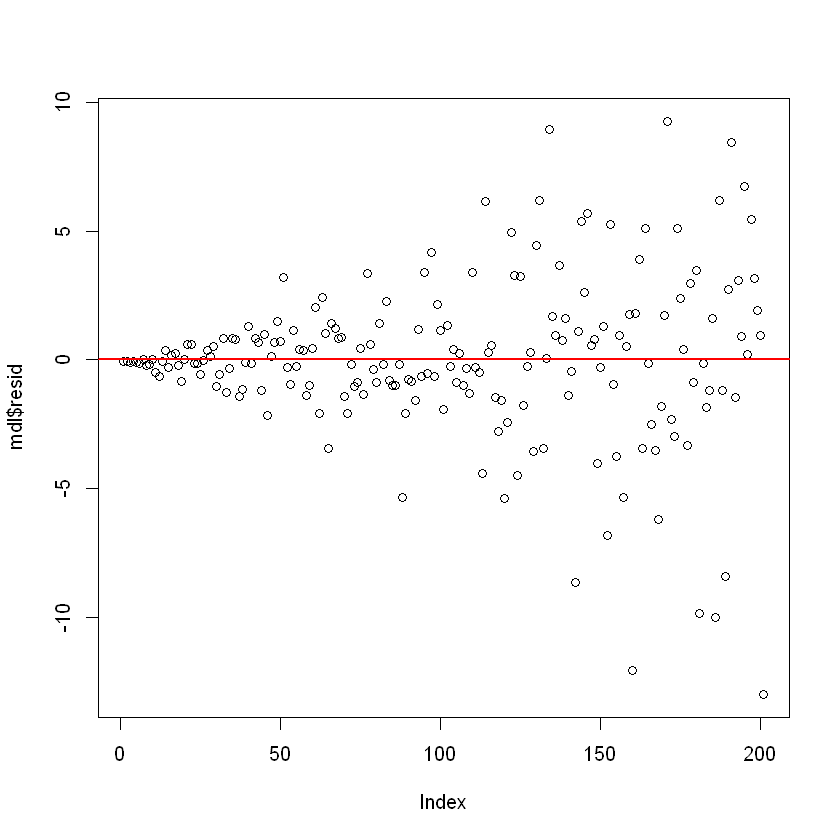

In [9]:
mdl = lm(Y~X)
plot(X, Y, xlab="Width of Jigsaw Puzzle (in)", ylab="Time to complete (hr)")
abline(mdl, col="red", lwd=3)

plot(mdl$resid)
abline(h=0, col="red", lwd="2")

# Question 3

**Refer to the HighPeaks data.**

## Part (a)

**What is the correlation between Y = Time of a hike and X = Elevation of the mountain?**

In [10]:
cor(Elevation, Time)

[1] -0.0162768

The linear correlation coefficient between Y = Time and X = Elevation is $r = -0.016$.

## Part (b)

Does it look like Elevation should be very helpful in predicting Time? Conduct an appropriate test and explain.

In [11]:
model1 = lm(Time~Elevation)
summary(model1)


Call:
lm(formula = Time ~ Elevation)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6912 -1.6985 -0.5639  1.2963  7.3015 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) 11.2113764  5.1953800   2.158   0.0364 *
Elevation   -0.0001269  0.0011756  -0.108   0.9145  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.826 on 44 degrees of freedom
Multiple R-squared:  0.0002649,	Adjusted R-squared:  -0.02246 
F-statistic: 0.01166 on 1 and 44 DF,  p-value: 0.9145


We can conduct a hypothesis test with the null hypothesis that there is no linear relation between Elevation and Time. From the table above, this results in a p-value of 0.9145 which is extremely high. Therefore we fail to reject the null hypothesis and conclude that there is not succificent evidence to reject the claim that there is no linear relation between Elevation and Time.